In [1]:
# Importamos librerías necesarias 
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import random

### Data reading

In [2]:
# Directorio de resultados .nii.gz y archivos originales
predictions_results_path = r'prediction_test/results_prediction_2d'
images_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr'

### Select files

In [5]:
# Obtenemos una lista de todos los archivos en el directorio
files = os.listdir(predictions_results_path)

# Seleccionamos un archivo al azar de la lista
file_selected = random.choice(files)
print(f"El archivo seleccionado es: {file_selected}")

El archivo seleccionado es: MS_061.nii.gz


### Show Results

original name: nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr\MS_061_0000.nii.gz


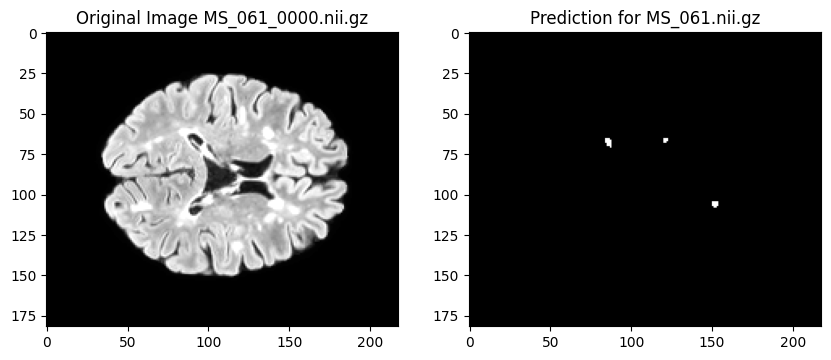

In [18]:
# El archivo seleccionado de ser del tipo .nii.gz
if file_selected.endswith('.nii.gz'):
    # Cargamos la imagen .nii.gz
    img_pred = nib.load(os.path.join(predictions_results_path, file_selected))
    
    # Obtenemos el nombre del archivo original correspondiente
    original_file_name = file_selected.replace('.nii.gz', '_0000.nii.gz')
    # print(f"original name: {os.path.join(images_patients_path, original_file_name)}")
    img_original = nib.load(os.path.join(images_patients_path, original_file_name))
    
    # Conviertimos la imagen en una matriz numpy
    data_pred = img_pred.get_fdata()
    data_original = img_original.get_fdata()

    # Eligemos un corte a lo largo del eje z
    corte_z_pred = data_pred[:, :, data_pred.shape[2]//2]
    corte_z_original = data_original[:, :, data_original.shape[2]//2]

    # Mostramos la predicción
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(corte_z_original, cmap='gray')
    axs[0].set_title(f"Original Image {original_file_name}")
    axs[1].imshow(corte_z_pred, cmap='gray')
    axs[1].set_title(f"Prediction for {file_selected}")
    plt.show()
else:
    print("El archivo seleccionado no es .nii.gz")

El archivo seleccionado es: MS_048.nii.gz


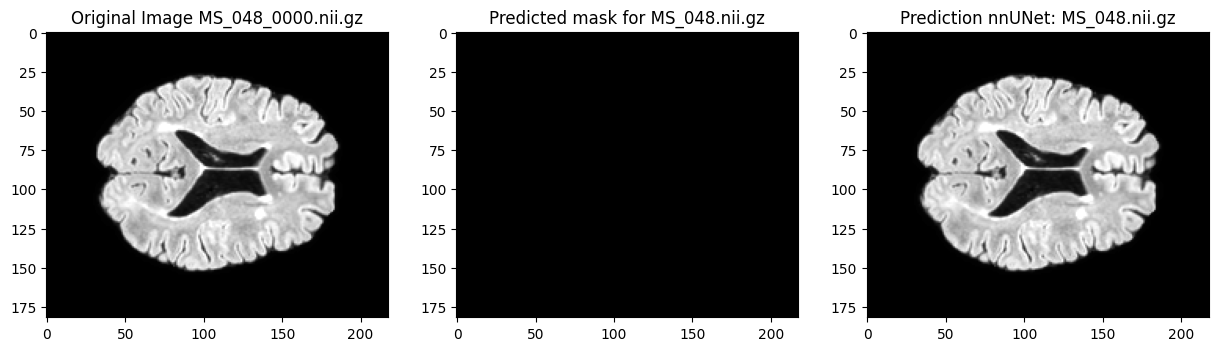

In [44]:
# Directorio de resultados .nii.gz y archivos originales
predictions_results_path = r'prediction_test/results_prediction_2d'
images_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr'

# Obtenemos una lista de todos los archivos en el directorio
files = os.listdir(predictions_results_path)

# Seleccionamos un archivo al azar de la lista
file_selected = random.choice(files)
print(f"El archivo seleccionado es: {file_selected}")

# El archivo seleccionado de ser del tipo .nii.gz
if file_selected.endswith('.nii.gz'):
    # Cargamos la imagen .nii.gz
    img_pred = nib.load(os.path.join(predictions_results_path, file_selected))
    
    # Obtenemos el nombre del archivo original correspondiente
    original_file_name = file_selected.replace('.nii.gz', '_0000.nii.gz')
    img_original = nib.load(os.path.join(images_patients_path, original_file_name))
    
    # Conviertimos la imagen en una matriz numpy
    data_pred = img_pred.get_fdata()
    data_original = img_original.get_fdata()

    # Eligemos un corte a lo largo del eje z
    corte_z_pred = data_pred[:, :, data_pred.shape[2]//2]
    corte_z_original = data_original[:, :, data_original.shape[2]//2]

    # Superponemos la predicción en la imagen original
    img_superimposed = corte_z_original.copy()
    img_superimposed[corte_z_pred > 0] = np.max(corte_z_original)

    # Mostramos la predicción
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(corte_z_original, cmap='gray')
    axs[0].set_title(f"Original Image {original_file_name}")
    axs[1].imshow(corte_z_pred, cmap='gray')
    axs[1].set_title(f"Predicted mask for {file_selected}")

    # Utilizamos colormap en rojo para destacar la lesion y sea más apreciable
    # axs[2].imshow(img_superimposed, alpha=0.4, cmap='Reds')
    axs[2].imshow(img_superimposed, cmap='gray')
    axs[2].set_title(f"Prediction nnUNet: {file_selected}")
    plt.show()
else:
    print("El archivo seleccionado no es .nii.gz")

El archivo seleccionado es: MS_095.nii.gz


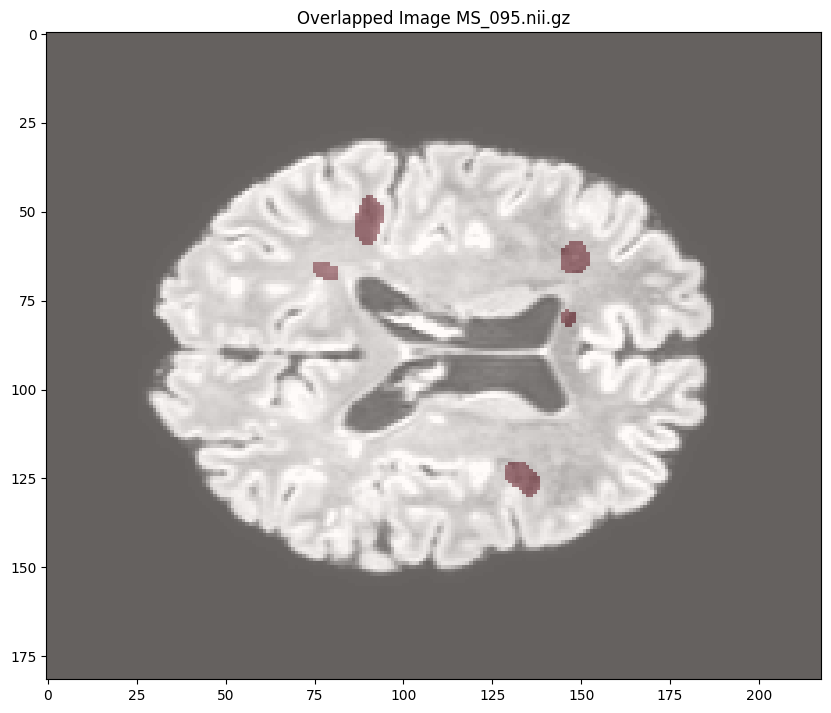

In [42]:
# Directorio de resultados .nii.gz y archivos originales
predictions_results_path = r'prediction_test/results_prediction_2d'
images_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr'

# Obtenemos una lista de todos los archivos en el directorio
files = os.listdir(predictions_results_path)

# Seleccionamos un archivo al azar de la lista
file_selected = random.choice(files)
print(f"El archivo seleccionado es: {file_selected}")

# El archivo seleccionado de ser del tipo .nii.gz
if file_selected.endswith('.nii.gz'):
    # Cargamos la imagen .nii.gz
    img_pred = nib.load(os.path.join(predictions_results_path, file_selected))
    
    # Obtenemos el nombre del archivo original correspondiente
    original_file_name = file_selected.replace('.nii.gz', '_0000.nii.gz')
    img_original = nib.load(os.path.join(images_patients_path, original_file_name))
    
    # Conviertimos la imagen en una matriz numpy
    data_pred = img_pred.get_fdata()
    data_original = img_original.get_fdata()

    # Eligemos un corte a lo largo del eje z
    corte_z_pred = data_pred[:, :, data_pred.shape[2]//2]
    corte_z_original = data_original[:, :, data_original.shape[2]//2]

    # Creamos la imagen superpuesta
    plt.figure(figsize=(10,10))
    plt.imshow(corte_z_original, cmap='gray')
    # Utilizamos colormap en rojo para destacar la lesion y sea más apreciable
    plt.imshow(corte_z_pred, alpha=0.4, cmap='Reds') 
    plt.title(f"Overlapped Image {file_selected}")
    plt.show()
else:
    print("El archivo seleccionado no es .nii.gz")

El archivo seleccionado es: MS_057.nii.gz


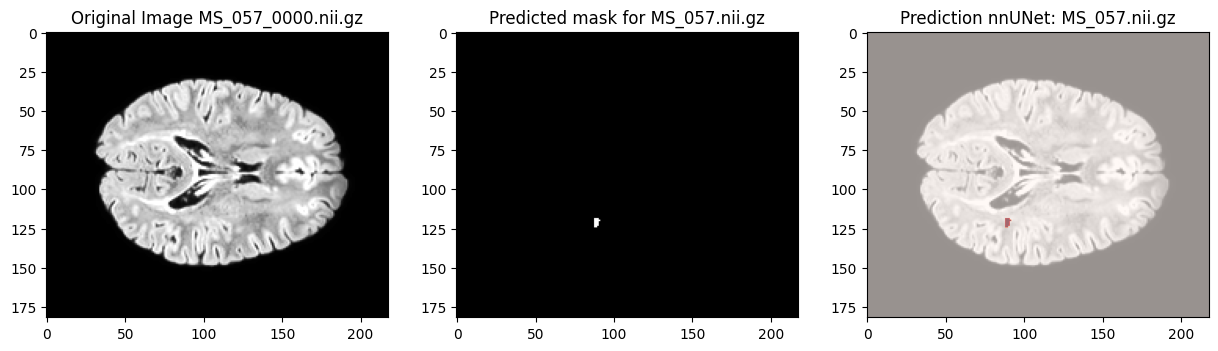

In [50]:
# Directorio de resultados .nii.gz y archivos originales
predictions_results_path = r'prediction_test/results_prediction_2d'
images_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr'

# Obtenemos una lista de todos los archivos en el directorio
files = os.listdir(predictions_results_path)

# Seleccionamos un archivo al azar de la lista
file_selected = random.choice(files)
print(f"El archivo seleccionado es: {file_selected}")

# El archivo seleccionado de ser del tipo .nii.gz
if file_selected.endswith('.nii.gz'):
    # Cargamos la imagen .nii.gz
    img_pred = nib.load(os.path.join(predictions_results_path, file_selected))
    
    # Obtenemos el nombre del archivo original correspondiente
    original_file_name = file_selected.replace('.nii.gz', '_0000.nii.gz')
    img_original = nib.load(os.path.join(images_patients_path, original_file_name))
    
    # Conviertimos la imagen en una matriz numpy
    data_pred = img_pred.get_fdata()
    data_original = img_original.get_fdata()

    # Eligemos un corte a lo largo del eje z
    corte_z_pred = data_pred[:, :, data_pred.shape[2]//2]
    corte_z_original = data_original[:, :, data_original.shape[2]//2]

    # Superponemos la predicción en la imagen original
    img_superimposed = corte_z_original.copy()
    img_superimposed[corte_z_pred > 0] = np.max(corte_z_original)

    # Mostramos la predicción
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(corte_z_original, cmap='gray')
    axs[0].set_title(f"Original Image {original_file_name}")
    axs[1].imshow(corte_z_pred, cmap='gray')
    axs[1].set_title(f"Predicted mask for {file_selected}")

    # Utilizamos colormap en rojo para destacar la lesion y sea más apreciable
    axs[2].imshow(img_superimposed, cmap='gray')
    
    # Escalamos los valores de la máscara por el máximo valor de la imagen original, 
    # nos aseguramos de que la máscara será claramente visible cuando se superponga 
    # sobre la imagen original.
    axs[2].imshow(corte_z_pred * np.max(corte_z_original), alpha=0.6, cmap='Reds')
    axs[2].set_title(f"Prediction nnUNet: {file_selected}")
    plt.show()
else:
    print("El archivo seleccionado no es .nii.gz")

El archivo seleccionado es: MS_039.nii.gz


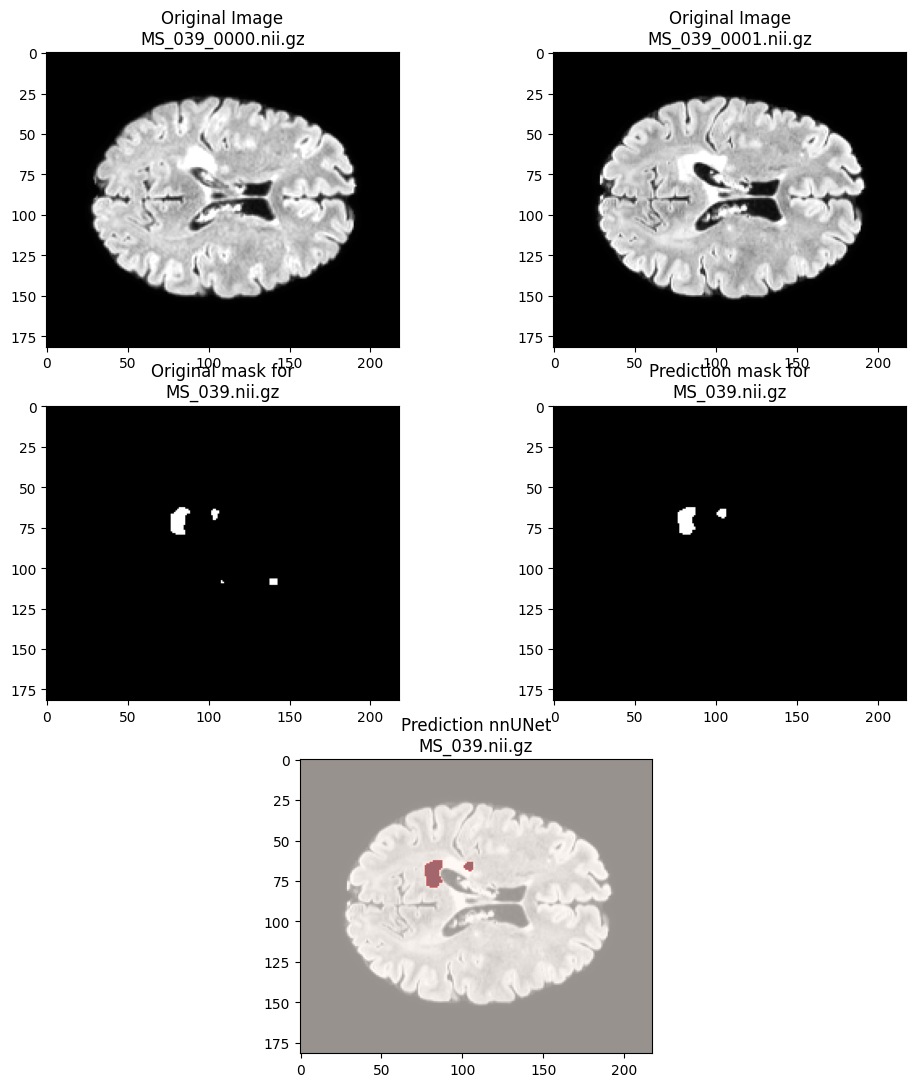

In [110]:
# Directorio de resultados .nii.gz y archivos originales
predictions_results_path = r'prediction_test/results_prediction_2d'
images_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/imagesTr'
labels_patients_path = r'nnUNet_raw_data_base/nnUNet_raw_data/Dataset500_MS_Lesions/labelsTr'

# Obtenemos una lista de todos los archivos en el directorio
files = os.listdir(predictions_results_path)

# Seleccionamos un archivo al azar de la lista
file_selected = random.choice(files)
print(f"El archivo seleccionado es: {file_selected}")

# El archivo seleccionado de ser del tipo .nii.gz
if file_selected.endswith('.nii.gz'):
    # Cargamos la imagen .nii.gz
    img_pred = nib.load(os.path.join(predictions_results_path, file_selected))
    mask_original = nib.load(os.path.join(labels_patients_path, file_selected))

    # Obtenemos el nombre del archivo original correspondiente
    original_file_name_0 = file_selected.replace('.nii.gz', '_0000.nii.gz')
    original_file_name_1 = file_selected.replace('.nii.gz', '_0001.nii.gz')

    img_original_0 = nib.load(os.path.join(images_patients_path, original_file_name_0))
    img_original_1 = nib.load(os.path.join(images_patients_path, original_file_name_1))

    # Conviertimos la imagen en una matriz numpy
    data_pred = img_pred.get_fdata()
    data_original_0 = img_original_0.get_fdata()
    data_original_1 = img_original_1.get_fdata()
    mask_original = mask_original.get_fdata()

    # Eligemos un corte a lo largo del eje z
    corte_z_pred = data_pred[:, :, data_pred.shape[2] // 2]
    corte_z_original_0 = data_original_0[:, :, data_original_0.shape[2] // 2]
    corte_z_original_1 = data_original_1[:, :, data_original_1.shape[2] // 2]
    corte_z_mask_original = mask_original[:, :, mask_original.shape[2] // 2]

    # Superponemos la predicción en la imagen original
    img_superimposed = corte_z_original_1.copy()
    img_superimposed[corte_z_pred > 0] = np.max(corte_z_original_1)

    # Mostramos la predicción
    fig = plt.figure(figsize=(12, 13))

    # Fusionamos las dos últimas subfiguras en una única
    # subfigura más grande que ocupe ambas columnas. 'subplot2grid()'
    axs = [plt.subplot2grid((3, 2), (i, j)) for i in range(2) for j in range(2)]
    axs.append(plt.subplot2grid((3, 2), (2, 0), colspan=2))

    axs[0].imshow(corte_z_original_0, cmap='gray')
    axs[0].set_title(f"Original Image\n{original_file_name_0}")

    axs[1].imshow(corte_z_original_1, cmap='gray')
    axs[1].set_title(f"Original Image\n{original_file_name_1}")

    axs[2].imshow(corte_z_mask_original, cmap='gray')
    axs[2].set_title(f"Original mask for\n{file_selected}")

    axs[3].imshow(corte_z_pred, cmap='gray')
    axs[3].set_title(f"Prediction mask for\n{file_selected}")

    # Utilizamos colormap en rojo para destacar la lesion y sea más apreciable
    axs[4].imshow(img_superimposed, cmap='gray')
    axs[4].imshow(corte_z_pred * np.max(corte_z_original_1), alpha=0.6, cmap='Reds')
    axs[4].set_title(f"Prediction nnUNet\n{file_selected}")

    plt.show()
else:
    print("El archivo seleccionado no es .nii.gz")